In [ ]:
TITANIC SURVIVAL PREDICTION

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Load the Data
t = pd.read_csv("C:/Users/kavya/Downloads/Titanic-Dataset.csv")
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 2. Explore the Data
t.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
print(t.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# 3. Preprocess the Data
# Handle missing values
t['Age'] = t['Age'].fillna(t['Age'].median())
t['Embarked'] = t['Embarked'].fillna(t['Embarked'].mode()[0])

In [6]:
# Drop the 'Cabin' column due to too many missing values
if 'Cabin' in t.columns:
    t = t.drop(columns=['Cabin'])

In [7]:
# Encode categorical variables
label = LabelEncoder()
t['Sex'] = label.fit_transform(t['Sex'])
t = pd.get_dummies(t, columns=['Embarked'], drop_first=True)

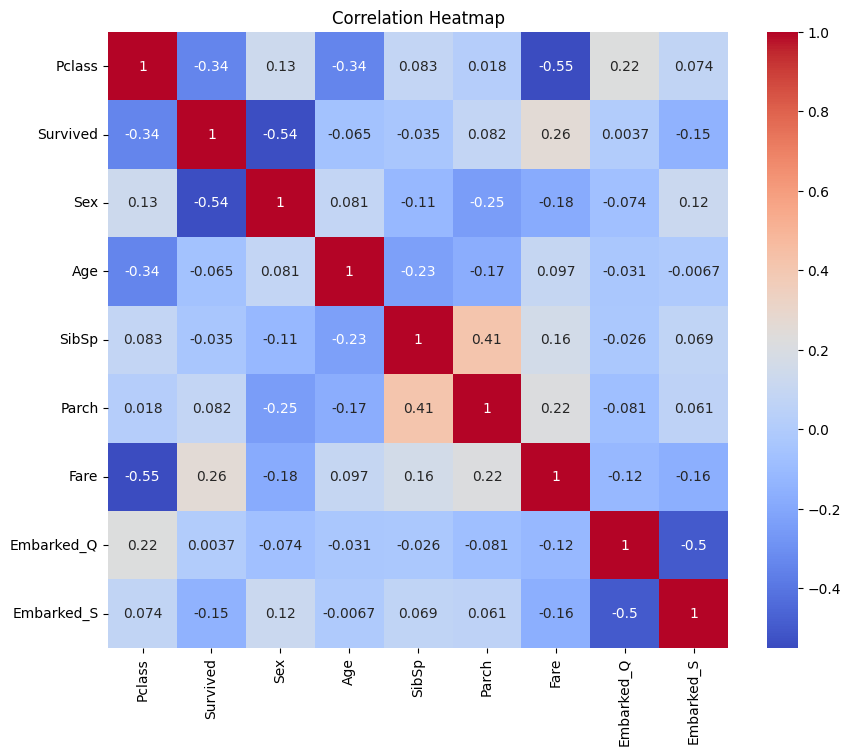

In [8]:
# 4. Visualize the Data
plt.figure(figsize=(10, 8))
sns.heatmap(t[['Pclass', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']].corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

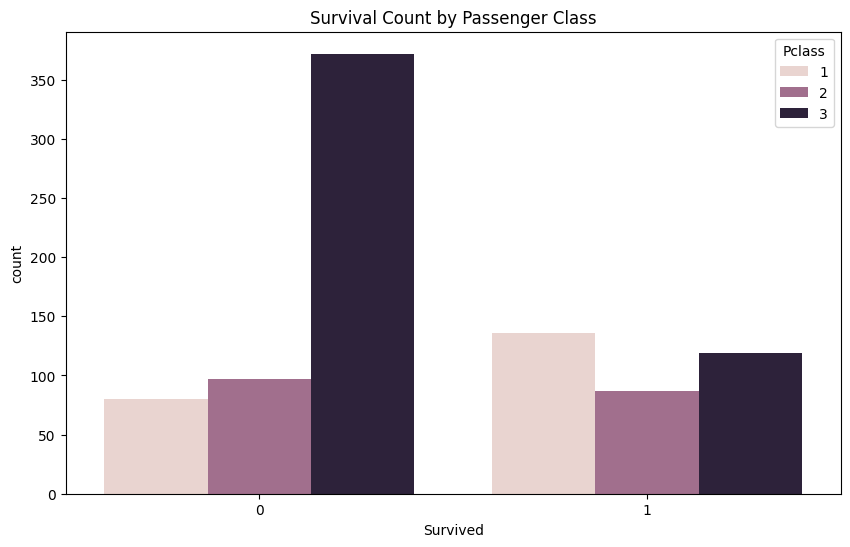

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Pclass', data=t)
plt.title('Survival Count by Passenger Class')
plt.show()

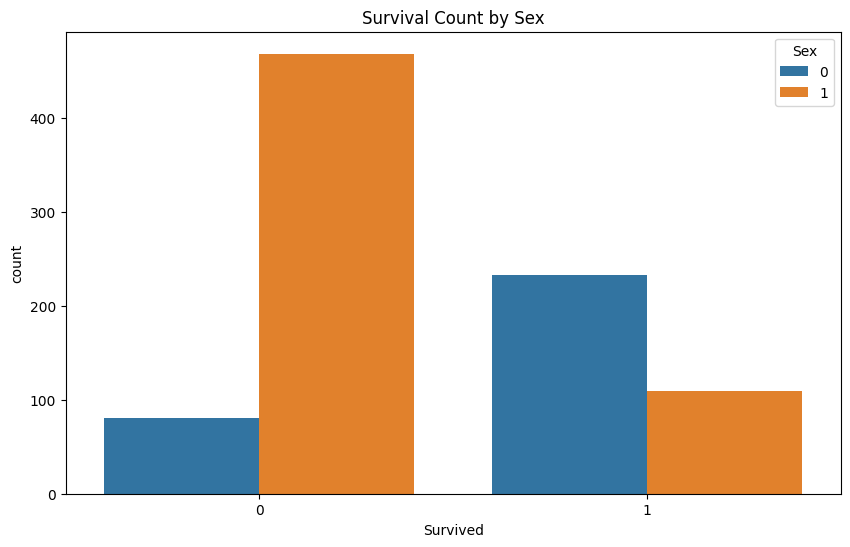

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data=t)
plt.title('Survival Count by Sex')
plt.show()

In [11]:
# 5. Split the Data
X = t[['Pclass', 'Sex']]
y = t['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 6. Train the Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
# 7. Evaluate the Model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 78.21%


In [14]:
# 8. Make Predictions
# Creating a DataFrame for the prediction input
new_data = pd.DataFrame({
    'Pclass': [3],
    'Sex': [0]
})

result = model.predict(new_data)
print("Survived" if result == 1 else "Not Survived")

Survived
